# Fama-French Five Factor Model Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(6, 4))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 15
np.set_printoptions(precision=4, suppress=True)
from dateutil.parser import parse
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Load data


- ```25portfolios_size_value```: 25 portfolios sorted by firm size and value signals
- ```25portfolios_size_mom```: 25 portfolios sorted by firm size and momentum signals
- ```5factordaily.csv```: Fama-French five factors

In [47]:
test_assets_daily = pd.read_excel("../00Data/fama-french/test_assets.xlsx", sheet_name="25portfolios_size_value",
                                 index_col=0)
test_assets_daily.index = [str(x) for x in test_assets_daily.index]
test_assets_daily.index = [parse(x) for x in test_assets_daily.index]

test_assets_daily2 = pd.read_excel("../00Data/fama-french/test_assets.xlsx", sheet_name="25portfolios_size_mom",
                                   index_col=0)
test_assets_daily2.index = [str(x) for x in test_assets_daily2.index]
test_assets_daily2.index = [parse(x) for x in test_assets_daily2.index]

factors_daily = pd.read_csv("../00Data/fama-french/5factorsdaily.csv")
factors_daily.set_index('date', inplace=True)
factors_daily.index = pd.to_datetime(factors_daily.index)

In [48]:
factors_daily.head()

,mktrf,smb,hml,rmw,cma,rf,umd
date,,,,,,,
1963-07-31,-0.0013,0.0011,-0.0003,-0.0013,0.0030,0.00012,0.0001
1963-08-01,-0.0008,-0.0012,-0.0013,0.0013,-0.0008,0.00011,-0.0003
1963-08-02,0.0029,-0.0014,0.0016,-0.0005,0.0003,0.00011,0.0011
1963-08-05,0.0057,-0.0042,0.0016,0.0001,0.0008,0.00011,0.0017
1963-08-06,0.0060,-0.0036,0.0025,-0.0002,-0.0004,0.00011,0.0024


In [49]:
test_assets_daily.head()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
1963-07-01,-0.51,-0.81,-0.66,-0.58,-0.73,-0.87,-0.70,-0.37,-0.44,-0.83,...,-0.65,-0.52,-0.49,-0.93,-0.79,-0.63,-0.70,-0.63,-0.63,-1.30
1963-07-02,0.51,0.94,0.28,0.59,0.62,0.72,0.24,0.77,0.61,0.86,...,0.88,0.52,0.52,1.33,0.30,0.84,0.82,0.84,0.82,1.38
1963-07-03,0.80,0.52,0.71,0.50,0.35,0.46,0.60,0.54,0.38,0.57,...,0.78,0.38,0.51,0.50,1.12,0.65,0.60,0.97,0.65,0.38
1963-07-05,0.29,0.23,0.69,0.40,0.40,0.77,0.73,0.41,0.18,0.25,...,0.46,0.00,0.24,-0.03,0.32,0.57,0.20,1.03,0.14,0.18
1963-07-08,-0.42,-0.22,-0.63,-0.26,-0.49,-0.87,-0.92,-0.71,-0.56,-0.96,...,-0.22,-0.24,-0.49,-0.62,-0.70,-0.80,-0.44,-0.39,-0.81,-1.09


In [50]:
test_assets_daily2.head()

,SMALL LoPRIOR,ME1 PRIOR2,ME1 PRIOR3,ME1 PRIOR4,SMALL HiPRIOR,ME2 PRIOR1,ME2 PRIOR2,ME2 PRIOR3,ME2 PRIOR4,ME2 PRIOR5,...,ME4 PRIOR1,ME4 PRIOR2,ME4 PRIOR3,ME4 PRIOR4,ME4 PRIOR5,BIG LoPRIOR,ME5 PRIOR2,ME5 PRIOR3,ME5 PRIOR4,BIG HiPRIOR
1963-07-01,-0.69,-0.59,-0.77,-0.24,-0.55,-0.29,-0.68,-0.68,-0.41,-1.17,...,-0.63,-0.57,-0.64,-0.35,-0.84,-0.39,-0.63,-0.37,-1.05,-0.59
1963-07-02,0.31,0.28,0.34,0.39,1.44,0.29,0.42,0.35,0.91,0.92,...,0.51,0.61,0.58,0.69,0.92,0.41,0.77,0.79,1.08,0.76
1963-07-03,0.42,0.58,0.47,0.42,0.79,0.28,0.56,0.47,0.73,0.68,...,0.61,0.67,0.64,0.25,0.97,0.63,0.65,0.39,0.91,0.45
1963-07-05,0.49,0.18,0.33,0.13,0.50,0.16,0.70,0.45,0.12,0.29,...,0.47,0.26,0.11,0.23,0.20,0.37,0.19,0.75,0.40,0.48
1963-07-08,-0.25,-0.36,0.00,-0.38,-0.45,-0.35,-0.51,-0.34,-0.95,-1.47,...,-0.36,-0.04,-0.14,-0.41,-0.82,-0.57,-0.53,-0.42,-0.79,-0.88


### Data Preprocessing

In [51]:
# change data from percentage to numbers

factors_daily = factors_daily/100
test_assets_daily = test_assets_daily/100
test_assets_daily2 = test_assets_daily2/100

# compute gross return
factors_daily[['mkt']] = factors_daily[['mktrf']].values+factors_daily[['rf']].values
factors_daily[['smb', 'hml', 'rmw', 'cma', 'umd']] = factors_daily[['smb', 'hml', 'rmw', 'cma', 'umd']].values+factors_daily[['rf']].values

In [53]:
# split factors_daily dataframe
RF_daily = factors_daily[['rf']]
factors_daily = factors_daily[['mkt','smb', 'hml', 'rmw', 'cma']]

In [54]:
# resample to monthly data

factors_monthly = (1+factors_daily).resample('M').prod() - 1 
RF_monthly = (1+RF_daily).resample('M').prod() - 1
test_assets_monthly = (1+test_assets_daily).resample('M').prod() - 1
test_assets_monthly2 = (1+test_assets_daily2).resample('M').prod() - 1

In [55]:
# compute excess return

test_assets_RF_monthly = pd.DataFrame(test_assets_monthly.values - RF_monthly.values, 
                                      index=test_assets_monthly.index, columns=test_assets_monthly.columns)
test_assets_RF_monthly2 = pd.DataFrame(test_assets_monthly2.values - RF_monthly.values, 
                                      index=test_assets_monthly2.index, columns=test_assets_monthly2.columns)
factors_RF_monthly = pd.DataFrame(factors_monthly.values - RF_monthly.values, 
                                      index=factors_monthly.index, columns=factors_monthly.columns)

## Analysis with OLS Regression

In [57]:
factors_RF_monthly.head()

,mkt,smb,hml,rmw,cma
date,,,,,
1963-07-31,-0.000013,0.000011,-3.000000e-06,-0.000013,0.000030
1963-08-31,0.000497,-0.000074,1.660128e-04,0.000027,-0.000008
1963-09-30,-0.000157,-0.000042,9.964275e-07,-0.000059,0.000027
1963-10-31,0.000250,-0.000130,2.987538e-06,0.000255,-0.000154
1963-11-30,-0.000070,-0.000099,1.840132e-04,-0.000048,0.000211


In [58]:
def regression_test(portfolios, factors):
    
    """
    Function input:
        > portfolio: portfolio dataset to run the regression test in
        > factors: factors_RF_monthly dataset
    
    Function output:
        > A dictionary with the follow keys
            - alpha
            - mkt_beta
            - smb_beta
            - hml_beta
            - rmw_beta 
            - cma_beta 
            - alpha_95CI 
            - mkt_beta_95CI 
            - smb_beta_95CI 
            - hml_beta_95CI 
            - rmw_beta_95CI 
            - cma_beta_95CI 
    """
    N = portfolios.shape[1]
    portfolio_names = portfolios.columns
    
    ## regression results we are interested in
    result_dict = {
        # coefficients
        'alpha': np.zeros((N,)),
        'mkt_beta': np.zeros((N,)),
        'smb_beta': np.zeros((N,)),
        'hml_beta': np.zeros((N,)),
        'rmw_beta': np.zeros((N,)),
        'cma_beta': np.zeros((N,)),
        
         # confidence intervals
        'alpha_95CI': np.zeros((2, N)),
        'mkt_beta_95CI': np.zeros((2, N)),
        'smb_beta_95CI': np.zeros((2, N)),
        'hml_beta_95CI': np.zeros((2, N)),
        'rmw_beta_95CI': np.zeros((2, N)),
        'cma_beta_95CI': np.zeros((2, N)),
    }
    
    # run a regression for each portfolio, and store the result in result_dict
    for n in range(N): 
        
        # run the regression
        model = sm.OLS(portfolios.values[:,n], sm.add_constant(factors.values))
        results = model.fit()
        
        # input datapoints into respective arrays
        result_dict['alpha'][n] = results.params[0]
        result_dict['mkt_beta'][n] = results.params[1]
        result_dict['smb_beta'][n] = results.params[2]
        result_dict['hml_beta'][n] = results.params[3]
        result_dict['rmw_beta'][n] = results.params[4]
        result_dict['cma_beta'][n] = results.params[5]
        
        result_dict['alpha_95CI'][:,n] = results.conf_int(alpha=0.05)[0,:]
        result_dict['mkt_beta_95CI'][:,n] = results.conf_int(alpha=0.05)[1,:]    
        result_dict['smb_beta_95CI'][:,n] = results.conf_int(alpha=0.05)[2,:]
        result_dict['hml_beta_95CI'][:,n] = results.conf_int(alpha=0.05)[3,:]
        result_dict['rmw_beta_95CI'][:,n] = results.conf_int(alpha=0.05)[4,:]
        result_dict['cma_beta_95CI'][:,n] = results.conf_int(alpha=0.05)[5,:]
        
    return result_dict

In [90]:
# Visulizations - barplot
def regressionResult_Vis(result, portfolio_names, title):
    
    N = len(portfolio_names)
    
    fig, axes = plt.subplots(3, 2, figsize=(24,16), sharex=True)

    axes[0,0].bar(np.arange(1,N+1,1), result['alpha'], yerr=(result['alpha']-result['alpha_95CI'])[0,:])
    axes[0,0].set_xticks(np.arange(1,26,1))
    axes[0,0].set_ylabel('Alpha')

    axes[0,1].bar(np.arange(1,N+1,1), result['mkt_beta'], yerr=(result['mkt_beta']-result['mkt_beta_95CI'])[0,:])
    axes[0,1].set_xticks(np.arange(1,N+1,1))
    axes[0,1].set_ylabel('Mkt Beta')

    axes[1,0].bar(np.arange(1,N+1,1), result['smb_beta'], yerr=(result['smb_beta']-result['smb_beta_95CI'])[0,:])
    axes[1,0].set_xticks(np.arange(1,26,1))
    axes[1,0].set_ylabel('SMB beta')

    axes[1,1].bar(np.arange(1,N+1,1), result['hml_beta'], yerr=(result['hml_beta']-result['hml_beta_95CI'])[0,:])
    axes[1,1].set_xticks(np.arange(1,26,1))
    axes[1,1].set_ylabel('HML beta')
    
    axes[2,0].bar(np.arange(1,N+1,1), result['rmw_beta'], yerr=(result['rmw_beta']-result['rmw_beta_95CI'])[0,:])
    axes[2,0].set_xticks(np.arange(1,26,1))
    axes[2,0].set_xticklabels(portfolio_names, rotation=90, fontsize='small')
    axes[2,0].set_xlabel('Test Assets')
    axes[2,0].set_ylabel('RMW beta')
    
    axes[2,1].bar(np.arange(1,N+1,1), result['cma_beta'], yerr=(result['cma_beta']-result['cma_beta_95CI'])[0,:])
    axes[2,1].set_xticks(np.arange(1,26,1))
    axes[2,1].set_xticklabels(portfolio_names, rotation=90, fontsize='small')
    axes[2,1].set_xlabel('Test Assets')
    axes[2,1].set_ylabel('CMA beta')
    
    plt.suptitle(title, fontsize= 30)

    plt.tight_layout()

In [96]:
def ff5Performance_Vis(result, portfolio, factors, title):

    mean_rets_realized = portfolio.values.mean(axis=0)
    mean_rets_ff5 = result['mkt_beta']*factors[['mkt']].values.mean() + \
                    result['smb_beta']*factors[['smb']].values.mean() + \
                    result['hml_beta']*factors[['hml']].values.mean() + \
                    result['rmw_beta']*factors[['rmw']].values.mean() + \
                    result['cma_beta']*factors[['cma']].values.mean()

    fig, axes = plt.subplots(3, 2, figsize=(8,8), sharey=True)

    axes[0,0].scatter(mean_rets_ff5, mean_rets_realized)
    axes[0,0].set_xlabel('FF3 predicted returns')
    axes[0,0].set_ylabel('Observed realised returns')

    axes[0,1].scatter(result['mkt_beta'], mean_rets_realized)
    axes[0,1].set_xlabel('Mkt beta')

    axes[1,0].scatter(result['smb_beta'], mean_rets_realized)
    axes[1,0].set_xlabel('SMB beta')
    axes[1,0].set_ylabel('Observed realised returns')

    axes[1,1].scatter(result['hml_beta'], mean_rets_realized)
    axes[1,1].set_xlabel('HML beta')
    
    axes[2,0].scatter(result['rmw_beta'], mean_rets_realized)
    axes[2,0].set_xlabel('RMW beta')
    axes[2,0].set_ylabel('Observed realised returns')
    
    axes[2,1].scatter(result['cma_beta'], mean_rets_realized)
    axes[2,1].set_xlabel('CMA beta')
    
    plt.suptitle(title, fontsize= 20)

    plt.tight_layout()

In [82]:
asset1_result = regression_test(test_assets_RF_monthly, factors_RF_monthly)
asset2_result = regression_test(test_assets_RF_monthly2, factors_RF_monthly)

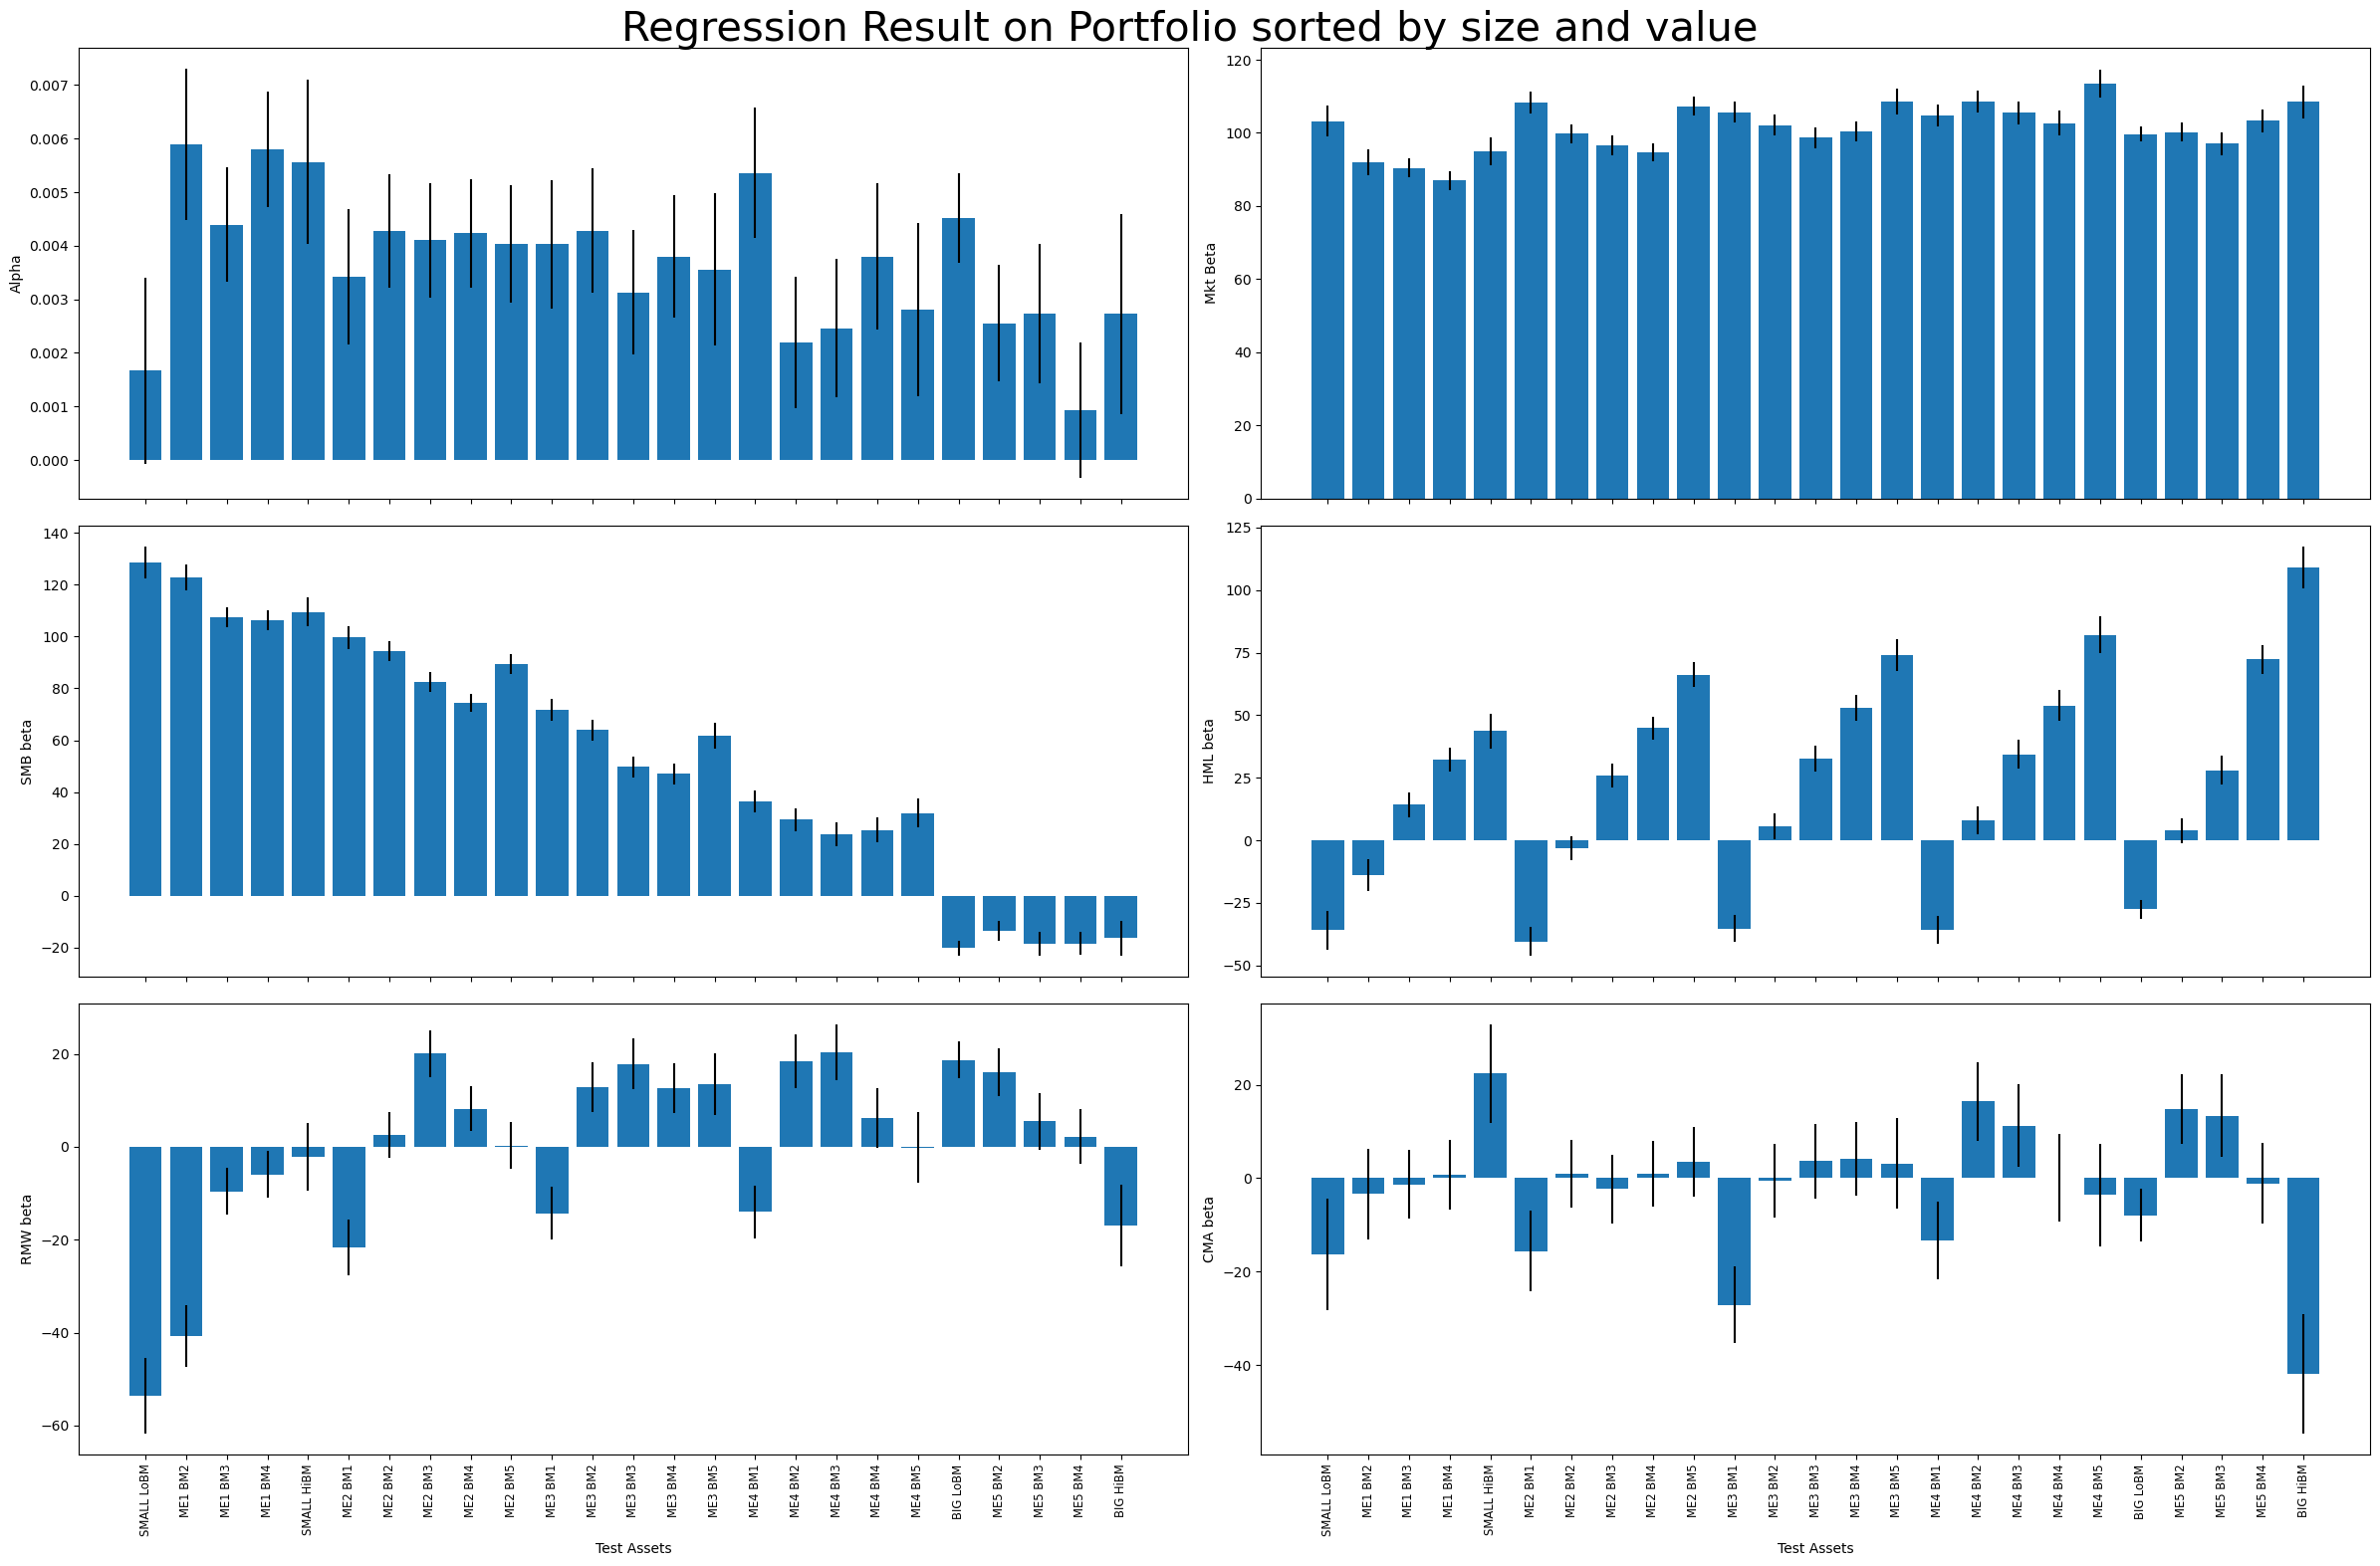

In [91]:
regressionResult_Vis(asset1_result, test_assets_RF_monthly.columns, "Regression Result on Portfolio sorted by size and value")

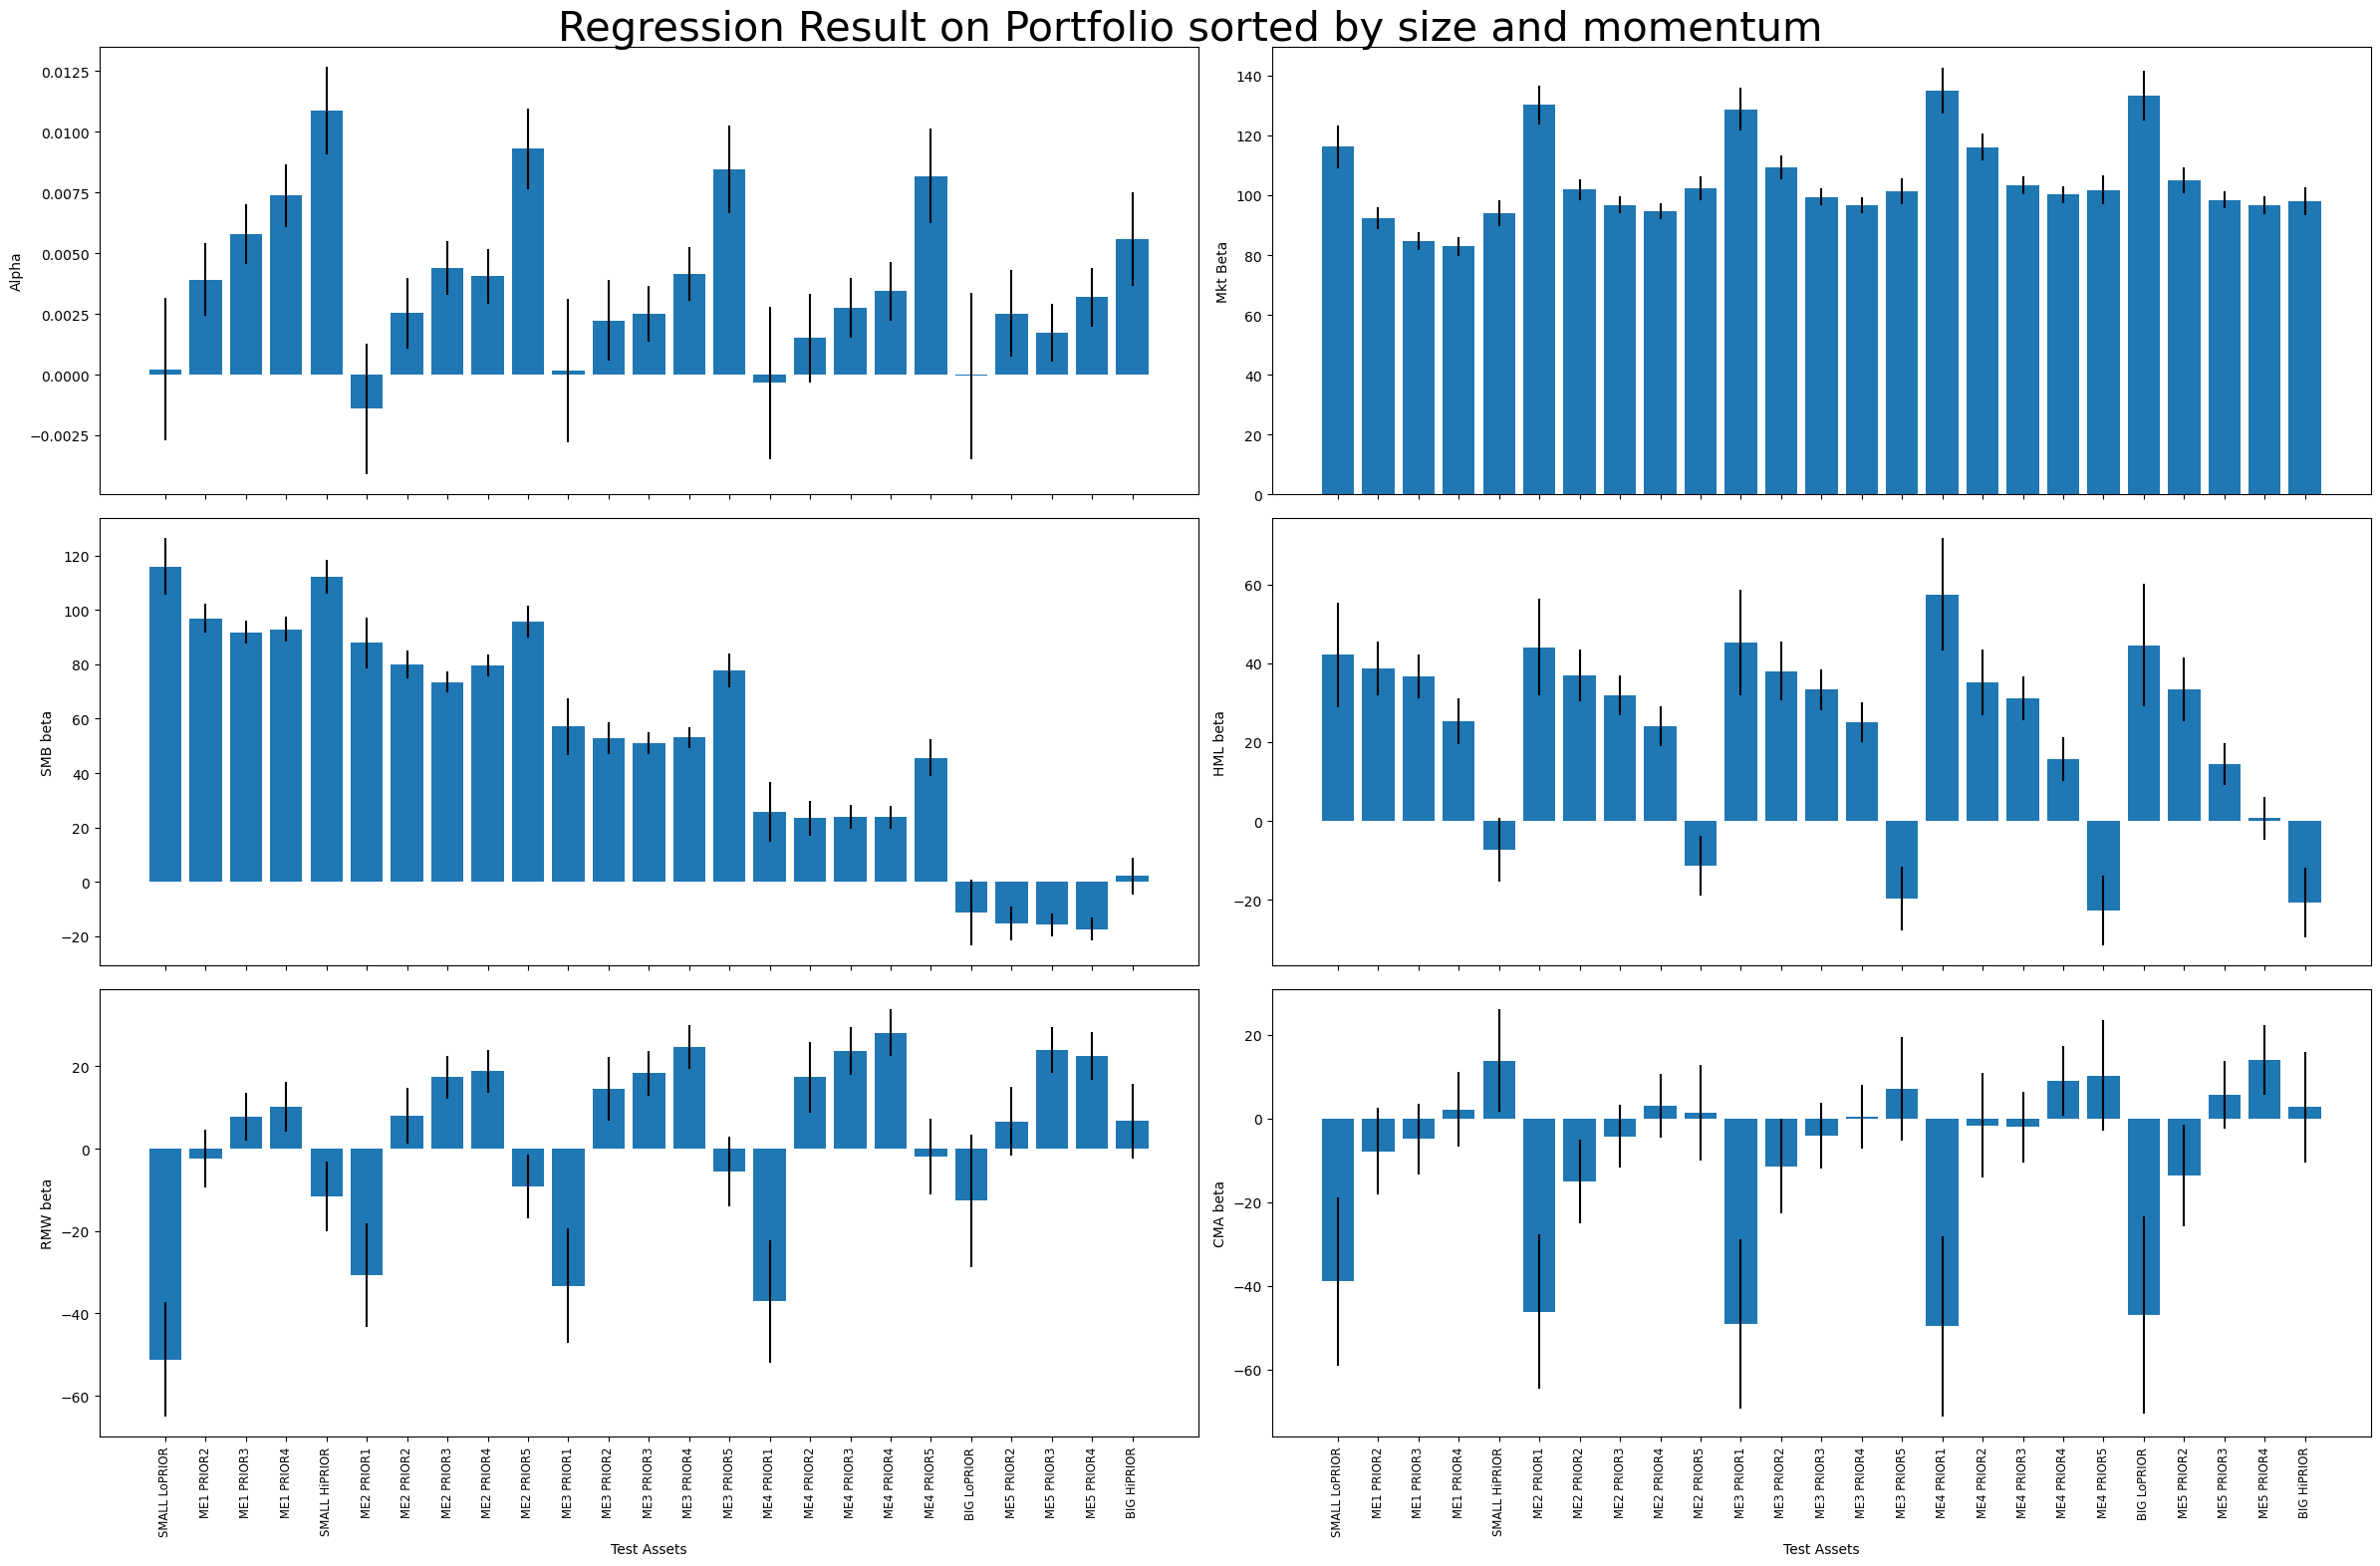

In [93]:
regressionResult_Vis(asset2_result, test_assets_RF_monthly2.columns, "Regression Result on Portfolio sorted by size and momentum")

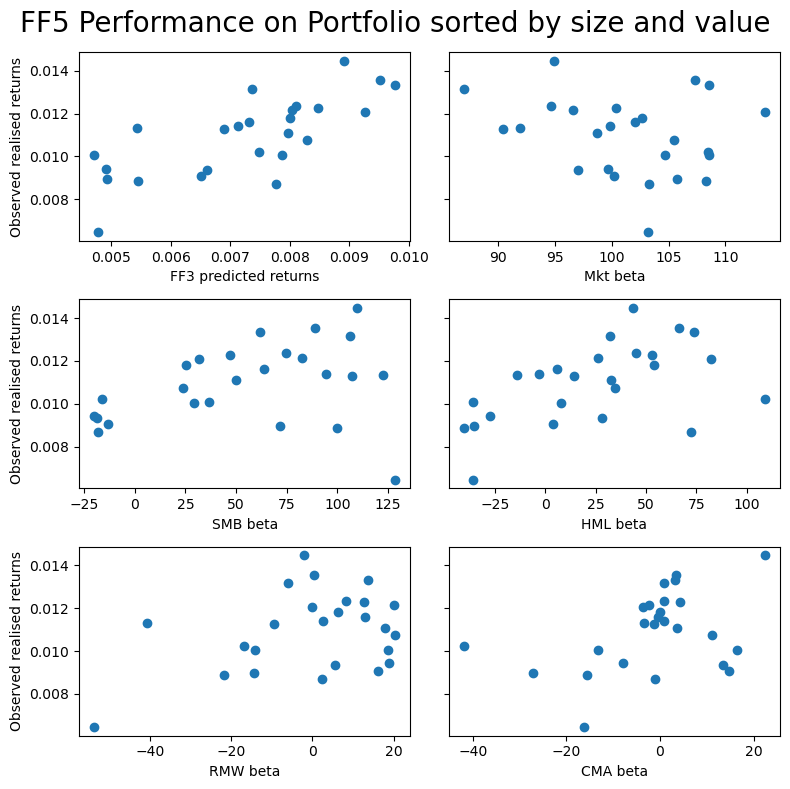

In [97]:
ff5Performance_Vis(asset1_result, test_assets_RF_monthly, factors_RF_monthly, "FF5 Performance on Portfolio sorted by size and value")

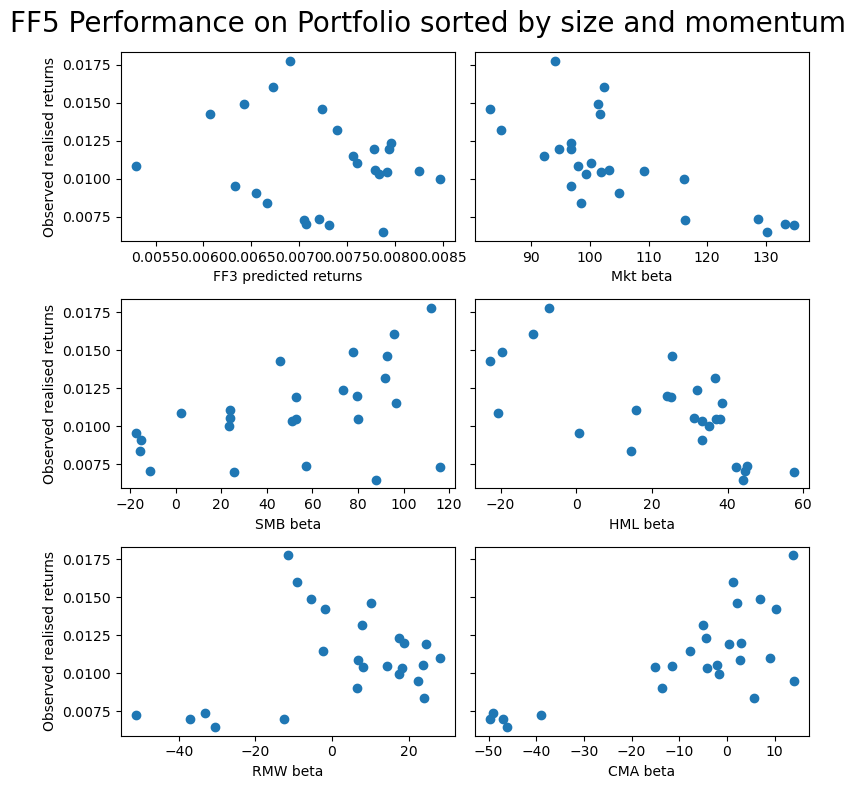

In [98]:
ff5Performance_Vis(asset2_result, test_assets_RF_monthly2, factors_RF_monthly, "FF5 Performance on Portfolio sorted by size and momentum")